### 1) Importing Libraries and Data Loading

In [47]:
# Importing Libraries:

import pandas as pd
import numpy as np

from scipy.stats import shapiro, normaltest, kurtosis, skew
from statsmodels.stats.diagnostic import lilliefors
from statsmodels.api import qqplot

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.base import clone
from sklearn.feature_selection import SelectKBest, f_regression, RFECV

In [48]:
# Importing data:

df_raw = pd.read_csv("Solar_Power_Plant_Data.csv")

In [49]:
# Copy of the dataset:
df = df_raw.copy()

In [50]:
# Looking at the first 5 rolls:

df.head()

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,01.01.2017-00:00,0.6,0,1003.8,-7.4,0.1,97,0.0
1,01.01.2017-01:00,1.7,0,1003.5,-7.4,-0.2,98,0.0
2,01.01.2017-02:00,0.6,0,1003.4,-6.7,-1.2,99,0.0
3,01.01.2017-03:00,2.4,0,1003.3,-7.2,-1.3,99,0.0
4,01.01.2017-04:00,4.0,0,1003.1,-6.3,3.6,67,0.0


### 2) Data Cleaning

In [51]:
# Information about the dataset:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date-Hour(NMT)       8760 non-null   object 
 1   WindSpeed            8760 non-null   float64
 2   Sunshine             8760 non-null   int64  
 3   AirPressure          8760 non-null   float64
 4   Radiation            8760 non-null   float64
 5   AirTemperature       8760 non-null   float64
 6   RelativeAirHumidity  8760 non-null   int64  
 7   SystemProduction     8760 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 547.6+ KB


In [52]:
# Missing data:

df.isna().sum()

Date-Hour(NMT)         0
WindSpeed              0
Sunshine               0
AirPressure            0
Radiation              0
AirTemperature         0
RelativeAirHumidity    0
SystemProduction       0
dtype: int64

In [53]:
# Changing Date-Hour(NMT) column type:

df['Date-Hour(NMT)'] = pd.to_datetime(df['Date-Hour(NMT)'], format="%d.%m.%Y-%H:%M")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date-Hour(NMT)       8760 non-null   datetime64[ns]
 1   WindSpeed            8760 non-null   float64       
 2   Sunshine             8760 non-null   int64         
 3   AirPressure          8760 non-null   float64       
 4   Radiation            8760 non-null   float64       
 5   AirTemperature       8760 non-null   float64       
 6   RelativeAirHumidity  8760 non-null   int64         
 7   SystemProduction     8760 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 547.6 KB


In [54]:
# Setting the Date-Hour(NUMT) as the index:

df.set_index("Date-Hour(NMT)", inplace=True)

In [55]:
# Let's change the type of the numeric variables:

df['Sunshine'] = df['Sunshine'].astype("int16")
df['RelativeAirHumidity'] = df['RelativeAirHumidity'].astype("int16")
df['WindSpeed'] = df['WindSpeed'].astype("float32")
df['Radiation'] = df['Radiation'].astype("float32")
df['AirTemperature'] = df['AirTemperature'].astype("float32")

In [56]:
# Information about the dataset:

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-01-01 00:00:00 to 2017-12-31 23:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   WindSpeed            8760 non-null   float32
 1   Sunshine             8760 non-null   int16  
 2   AirPressure          8760 non-null   float64
 3   Radiation            8760 non-null   float32
 4   AirTemperature       8760 non-null   float32
 5   RelativeAirHumidity  8760 non-null   int16  
 6   SystemProduction     8760 non-null   float64
dtypes: float32(3), float64(2), int16(2)
memory usage: 342.2 KB


Conclusions

- No missing data.
- Date-Hour(NMT) is now a datetime type.
- Memory usage of the dataset reduced from 547.6 to 342.2 KB.

### 3) Exploratory Data Analysis

#### 3.1) Exploring the characteristics

In [57]:
# Descriptive Statistics:

df.describe()

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2.639823,11.180479,1010.361781,97.538498,6.978892,76.719406,684.746071
std,1.628754,21.171295,12.793971,182.336029,7.604266,19.278996,1487.454665
min,0.000000,0.000000,965.900000,-9.300000,-12.400000,13.000000,0.000000
25%,1.400000,0.000000,1002.800000,-6.200000,0.500000,64.000000,0.000000
50%,2.300000,0.000000,1011.000000,-1.400000,6.400000,82.000000,0.000000
75%,3.600000,7.000000,1018.200000,115.599998,13.400000,93.000000,464.249950
max,10.900000,60.000000,1047.300000,899.700012,27.100000,100.000000,7701.000000


In [58]:
# Range of datetime column:

print(f"Range of Datetime column: ({df.index.min()}) to ({df.index.max()})")

Range of Datetime column: (2017-01-01 00:00:00) to (2017-12-31 23:00:00)


In [59]:
# Let's see how many data points have negative Radiation:

df[df["Radiation"] < 0].shape

(4464, 7)

In [60]:
# Analysing average monthly Radiation and Sunshine:

df["Months"] = df.index.month_name()
df["Month_number"] = df.index.month
monthly_rad_sun = df.groupby(["Month_number", "Months"]).agg({"Radiation":"mean", "Sunshine":"mean"}).\
    droplevel(level="Month_number")


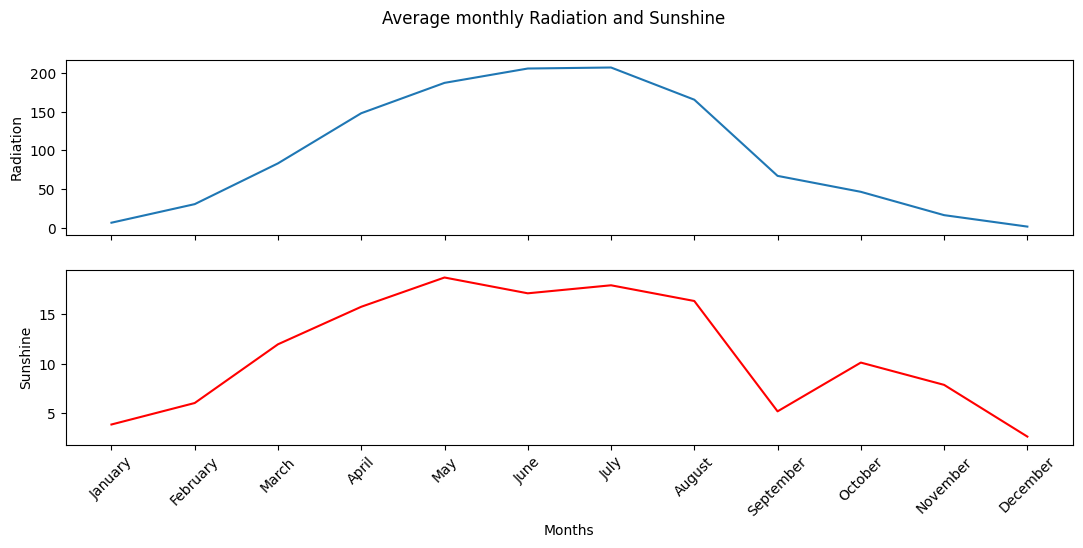

In [61]:
# Line plot of the Average monthly Radiation and Sushine

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(13, 5))
fig.suptitle("Average monthly Radiation and Sunshine")
plt.xticks(rotation=45)

sns.lineplot(monthly_rad_sun["Radiation"], ax=ax[0])
sns.lineplot(monthly_rad_sun["Sunshine"], ax=ax[1], c="r");

In [62]:
# Dropping Months and Month_number columns:

df.drop(columns=["Months", "Month_number"], inplace=True)

Conclusions

- One year of one-hour mesurements.
- As we can see from the statistic summary, there are some negative data points in Radiation column.
- Average Monthly Radiation is positive over the year.
- The increase of the Radiation and Sunshine between April and August may suggest that this location is situated in the Northern Hemisphere.
- Most data in SystemProduction and Sunshine columns may be zero.


#### 3.2) Distribution

We will look at the histogram of all variables

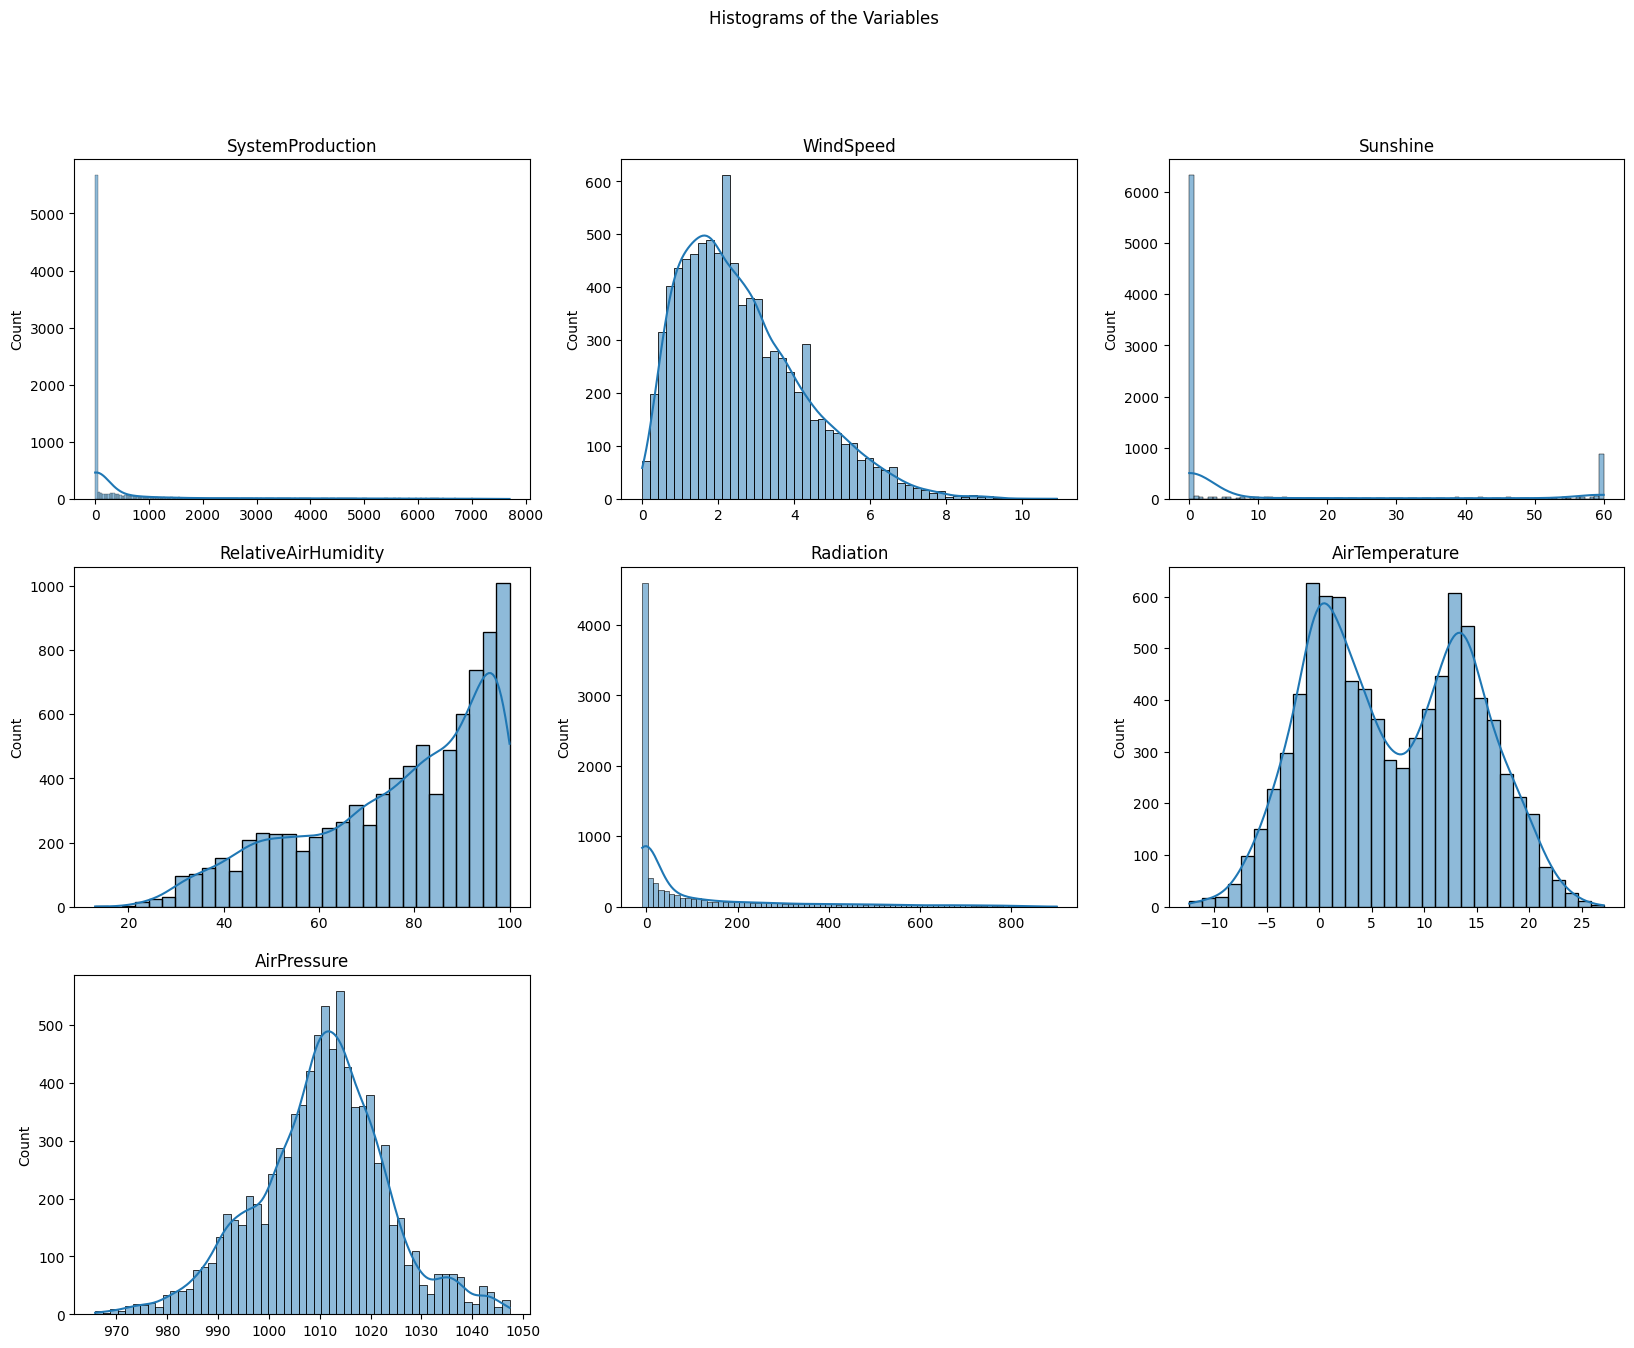

In [63]:
# Histograms:

fig, axes = plt.subplots(nrows=3, ncols=3, sharey=False, figsize=(20, 15))
fig.suptitle("Histograms of the Variables")

sns.histplot(df["SystemProduction"].values, ax=axes[0, 0], kde=True)
axes[0, 0].set_title("SystemProduction")

sns.histplot(df["WindSpeed"].values, ax=axes[0, 1], kde=True)
axes[0, 1].set_title("WindSpeed")

sns.histplot(df["Sunshine"].values, ax=axes[0][2], kde=True)
axes[0][2].set_title("Sunshine")

sns.histplot(df["RelativeAirHumidity"].values, ax=axes[1, 0], kde=True)
axes[1, 0].set_title("RelativeAirHumidity")

sns.histplot(df["Radiation"].values, ax=axes[1, 1], kde=True, legend=False)
axes[1, 1].set_title("Radiation")

sns.histplot(df["AirTemperature"].values, ax=axes[1, 2], kde=True)
axes[1, 2].set_title("AirTemperature")

sns.histplot(df["AirPressure"].values, ax=axes[2, 0], kde=True)
axes[2, 0].set_title("AirPressure");

axes[2, 1].set_visible(False)
axes[2, 2].set_visible(False)

Looking at the Histograms, we may think that AirPressure column was drew from a normal distribution. Let's look at the boxplots.

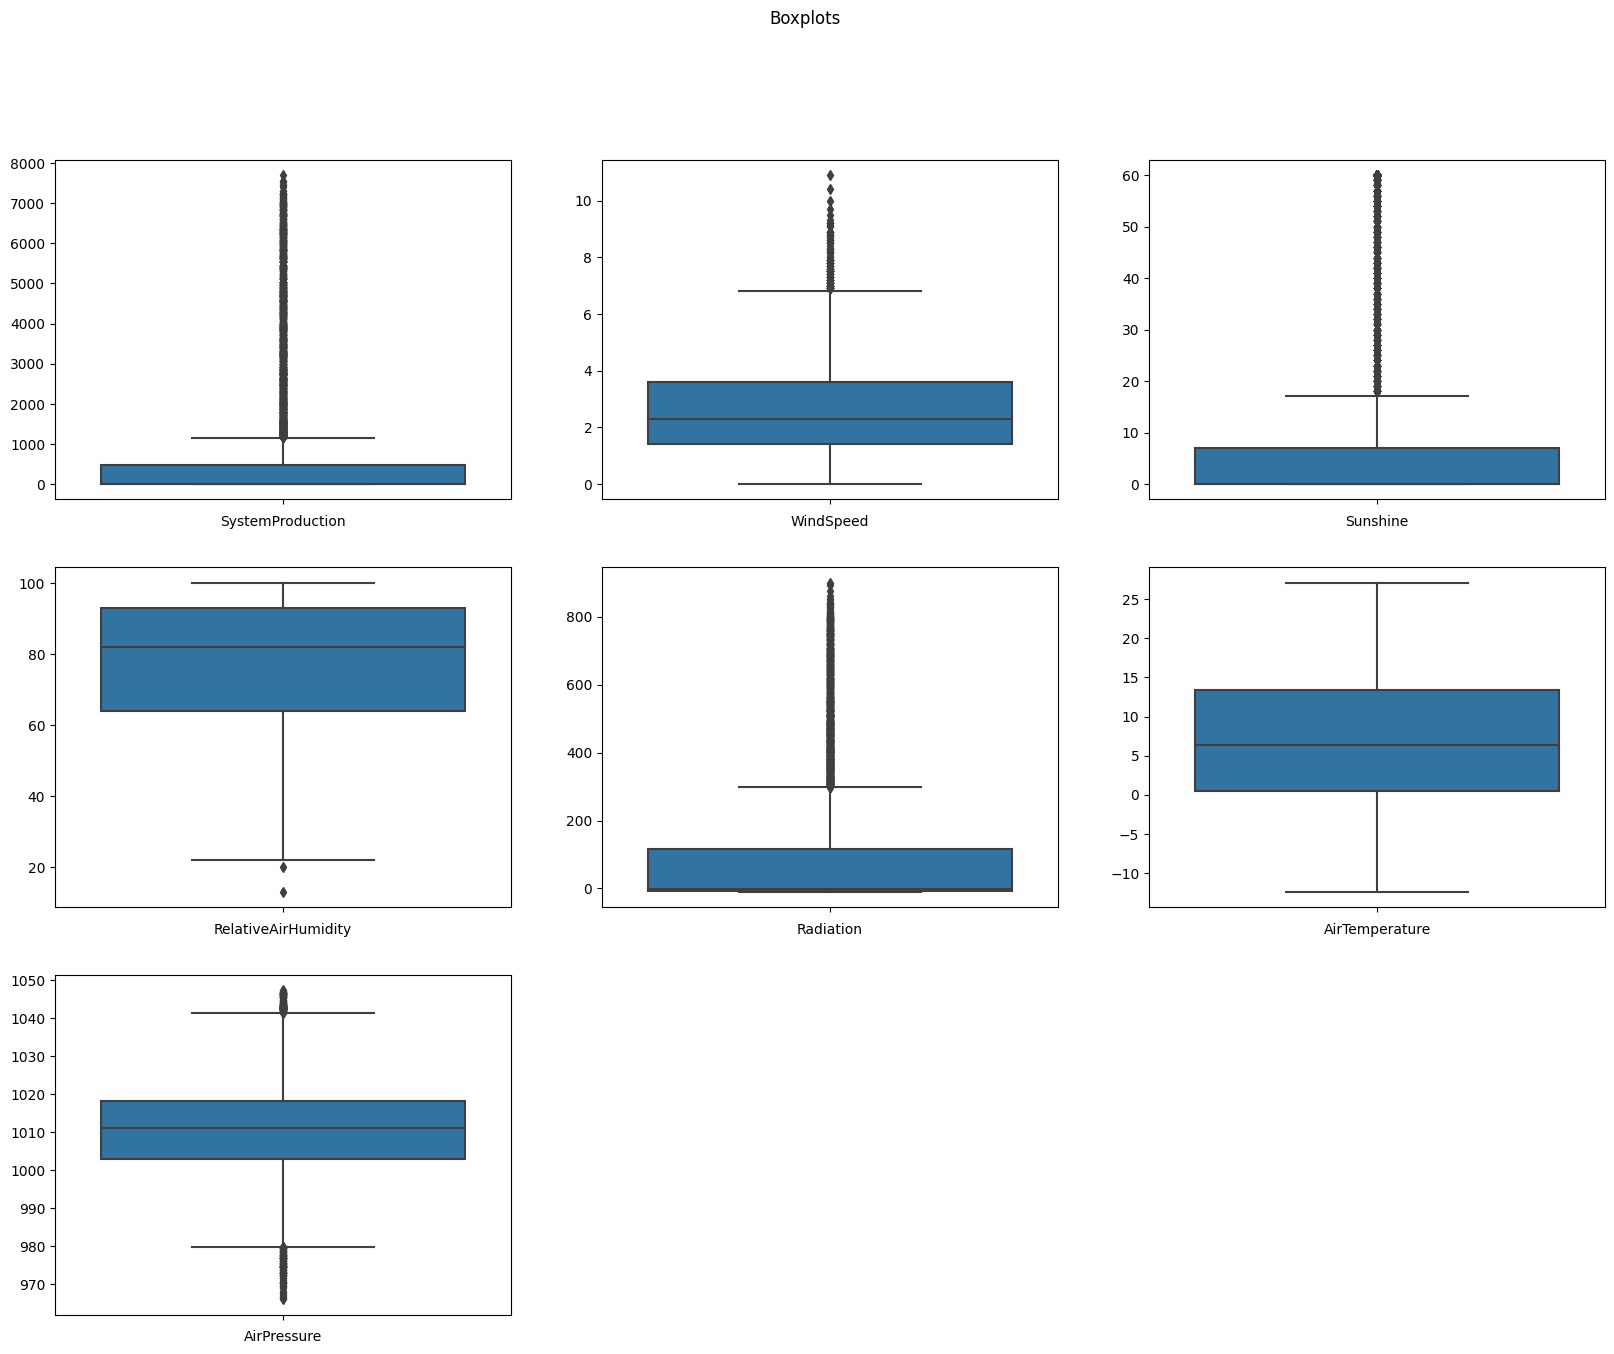

In [64]:
# BoxPlots:

fig, ax = plt.subplots(3, 3, figsize=(20, 15), sharey=False)
fig.suptitle("Boxplots")

sns.boxplot(y=df["SystemProduction"].values, ax=ax[0, 0])
ax[0, 0].set_xlabel("SystemProduction")

sns.boxplot(y=df["WindSpeed"].values, ax=ax[0, 1])
ax[0, 1].set_xlabel("WindSpeed")

sns.boxplot(y=df["Sunshine"].values, ax=ax[0, 2])
ax[0, 2].set_xlabel("Sunshine")

sns.boxplot(y=df["RelativeAirHumidity"].values, ax=ax[1, 0])
ax[1, 0].set_xlabel("RelativeAirHumidity")

sns.boxplot(y=df["Radiation"].values, ax=ax[1, 1])
ax[1, 1].set_xlabel("Radiation")

sns.boxplot(y=df["AirTemperature"].values, ax=ax[1, 2])
ax[1, 2].set_xlabel("AirTemperature")

sns.boxplot(y=df["AirPressure"].values, ax=ax[2, 0])
ax[2, 0].set_xlabel("AirPressure");

ax[2, 1].set_visible(False)
ax[2, 2].set_visible(False)

#### 3.3) Normality tests

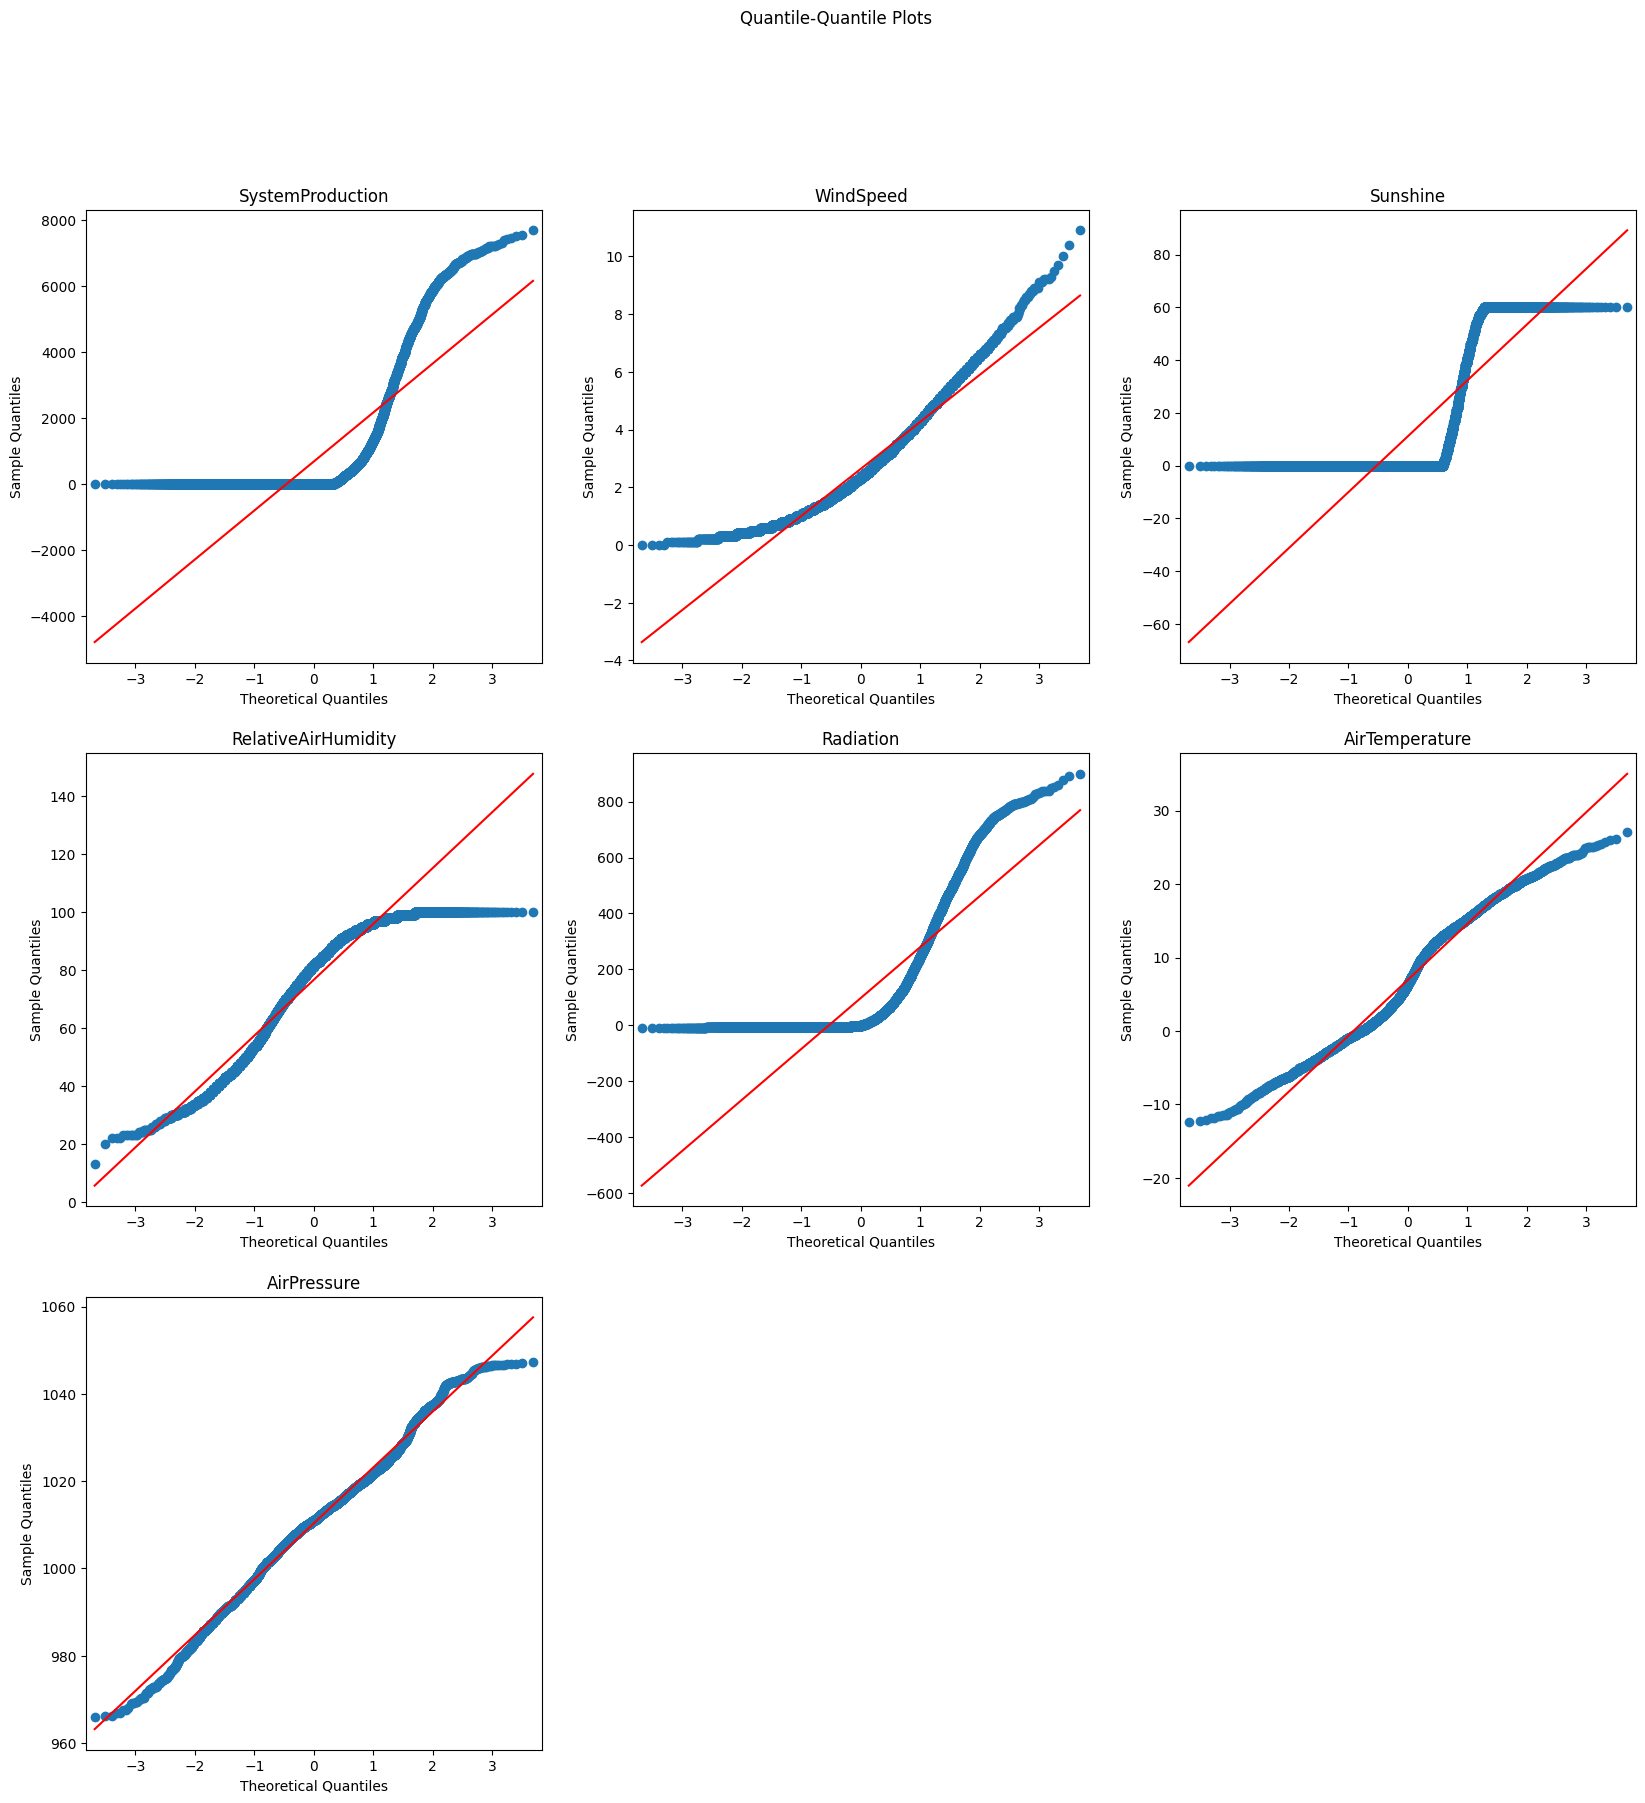

In [65]:
# QQ Plots:

# Defining subplots:
fig, axe = plt.subplots(3, 3, sharey=False, figsize=(20, 20))
fig.suptitle("Quantile-Quantile Plots")

# Plotting SystemProduction data:
qqplot(df["SystemProduction"], ax=axe[0, 0], line="s");
axe[0, 0].set_title("SystemProduction")

# Plotting WindSpeed data:
qqplot(df["WindSpeed"], ax=axe[0, 1], line="s")
axe[0, 1].set_title("WindSpeed")

# Plotting Sunshine data:
qqplot(df["Sunshine"], ax=axe[0, 2], line="s")
axe[0, 2].set_title("Sunshine")

# Ploting RelativeAirHumidity:
qqplot(df["RelativeAirHumidity"], ax=axe[1, 0], line="s")
axe[1, 0].set_title("RelativeAirHumidity")

# Radiation:
qqplot(df["Radiation"], ax=axe[1, 1], line="s")
axe[1, 1].set_title("Radiation")

# AirTemperature:
qqplot(df["AirTemperature"], ax=axe[1, 2], line="s")
axe[1, 2].set_title("AirTemperature")

# AirPressure
qqplot(df["AirPressure"], ax=axe[2, 0], line="s")
axe[2, 0].set_title("AirPressure");

axe[2, 1].set_visible(False)
axe[2, 2].set_visible(False)

As we can see from the qqplot and the Histogram above, it seems tha AirPressure follows a normal distribution. Let's quantify this assumption using statistical tests for normality.

- H0: Data was drew from a normal distribution.

- H1: Data was not drew from a normal distribution.

OBS: Using level of significance of 5% (alpha).

OBS2: Shapiro wilk p value is an approximate value due to the size of the sample being more than 5000.

In [66]:
# Function that Calculates Shapiro-Wilk, Lilliefors and D'Agostino_K2 tests:

def normality_tests(df: any):
    tests_names = ["Shapiro-Wilk", "Lilliefors", "D'Agostino_K2"]
    extern_index = np.array(sorted(tests_names*2))
    intern_index = np.array(["statistic", "p-value"]*len(tests_names))

    mult_index = [
        extern_index,
        intern_index
    ]

    results = pd.DataFrame(index=mult_index, columns=df.columns)
   
    for c in df.columns:
        
        # First D'Agostino's K-squared test:
        k2, k2_p = normaltest(df[c])

        # Secondly we will use the Lilliefors test:
        lilliefors_result = lilliefors(df[c])
        ksstat, lilliefours_p = lilliefors_result

        #  We will check the shapiro-Wilk test:
        shapiro_result = shapiro(df[c])
        shapiro_statistic, shapiro_p = shapiro_result.statistic, shapiro_result.pvalue

        results[c] = [k2, k2_p, ksstat, lilliefours_p, shapiro_statistic, shapiro_p]

    return results


# Function that calculates kurtosis and skewness of a dataset:

def kurtosis_skewness(dataset: any):
    index = ["Kurtosis", "Skewness"]
    results = pd.DataFrame(index=index, columns=dataset.columns)
    for c in dataset.columns:
        kurt = kurtosis(dataset[c])
        skewness = skew(dataset[c])
        results[c] = [kurt, skewness]

    return results

In [67]:
# Normality test results:

normality_tests(df)

c:\Users\caios\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


WindSpeed     Sunshine   AirPressure   
D'Agostino_K2 statistic   9.806524e+02  2095.571343  6.722747e+01  \
              p-value    1.132518e-213     0.000000  2.521971e-15   
Lilliefors    statistic   8.657087e-02     0.422402  4.527111e-02   
              p-value     1.000000e-03     0.001000  1.000000e-03   
Shapiro-Wilk  statistic   9.421549e-01     0.559635  9.922053e-01   
              p-value     0.000000e+00     0.000000  1.640946e-21   

                           Radiation  AirTemperature  RelativeAirHumidity   
D'Agostino_K2 statistic  3444.346422    2.245390e+03         7.997811e+02  \
              p-value       0.000000    0.000000e+00        2.136654e-174   
Lilliefors    statistic     0.278957    8.151557e-02         1.136078e-01   
              p-value       0.001000    1.000000e-03         1.000000e-03   
Shapiro-Wilk  statistic     0.640642    9.712175e-01         9.158114e-01   
              p-value       0.000000    1.376139e-38         0.000000e+00   

                         SystemProduction  
D'Agostino_K2 statistic       4487.420697  
              p-value            0.000000  
Lilliefors    statistic          0.322633  
              p-value            0.001000  
Shapiro-Wilk  statistic          0.532115  
              p-value            0.000000

In [68]:
# Kurtosis and Skewness:

kurtosis_skewness(df)

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
Kurtosis,0.645685,0.794225,0.413192,3.634802,-1.020777,-0.506118,5.930889
Skewness,0.904461,1.593429,-0.126781,2.078086,0.078606,-0.727069,2.568234


Distribution can be considered normal:

- Kurtosis between (-1, +1).

- Skewness between (-1, +1).

- Histogram and QQ Plot.


#### 3.4) Correlation

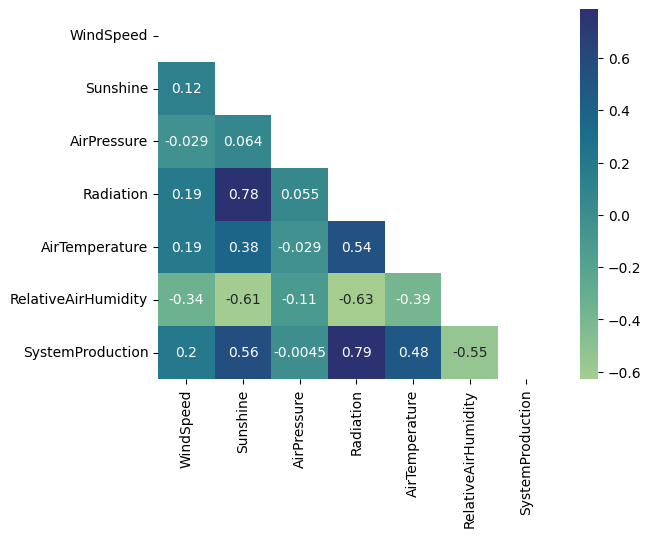

In [69]:
# Correlation Matrix:

def heatmap_cor(df):
    cor = df.corr()
    mascara = np.zeros_like(cor)
    mascara[np.triu_indices_from(mascara)] = True
    sns.heatmap(cor, mask=mascara, cbar=True, annot=True, cmap="crest")
    

heatmap_cor(df)

Conclusions

- Most of the data in SystemProduction is 0 as we expected since median is zero and the variable can't be negative.

- Outliers exist in SystemProduction, AirPressure, RelativeHumidity, Radiation, WindSpeed and Sunshine.

- All statistical tests have shown that the AirPressure not follows a normal distribution. However, all these tests are very sensitive when the sample size is large. So we can't rely on them.

- Histogram, QQ Plot, Kurtosis and Skewness tell us that AirPressue follows a normal distribution. Therefore, we will assume that AirPressure is normally distributed.

- Radiation has the highest positive correlation coefficient associated with the SystemProdution (0.79). It is also hightly correlated with Sushine column.

- RelativeAirHumidity has the lowest correlation coefficient associated with the Target. (-0.55)


### 4) Preprocessing

#### 4.1) Separating into training and testing sets

In [70]:
# Separating variables (features and target)

X = df.drop(columns="SystemProduction")
y = df["SystemProduction"]

In [71]:
# Divinding dataset in train and test:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 4.2) Feature Selection

In [178]:
# Class that put together many feature selection techniques:

class feature_selector:
    seed = 42
    def __init__(self, X, y) -> None:
        self.X_train = X
        self.y_train = y
    
    def  randomforestR_imp(self) -> None:
        model = RandomForestRegressor(random_state=feature_selector.seed)
        model.fit(self.X_train, self.y_train)
        series = pd.Series(index=model.feature_names_in_, data=model.feature_importances_).sort_values(ascending=False)

        # Plotting RandomForest Regression Importance:
        plt.title("RandomForest Importance")
        plt.xlabel("Importance")
        sns.barplot(x=series.values, y=series.index)
        

    def xgbR_imp(self) -> None:
        model = XGBRegressor(random_state=feature_selector.seed)
        model.fit(self.X_train, self.y_train)
        series = pd.Series(index=model.feature_names_in_, data=model.feature_importances_).sort_values(ascending=False)

        # Plotting XGboost Regression Feature Importance:
        plt.title("XGBoost Feature Importance")
        plt.xlabel("Importance")
        sns.barplot(y=series.index, x=series.values)

    def extraT_imp(self)->None:
        pass


    # Univariation feature selection:
    def univariate(self, statistic, n="all") -> None:
        selector = SelectKBest(score_func=statistic, k=n)
        selector.fit(self.X_train, self.y_train)
        
        series = pd.Series(index=selector.feature_names_in_, data=selector.scores_).\
            sort_values(ascending=False)
        plt.title("F-Regression Filtering")
        plt.xlabel("F-score")
        sns.barplot(y=series.index, x=series.values)

        return selector
    
    # Wrapper method for feature selection:
    def refcv(self):
        
        models = {
            "Lasso":Lasso(random_state=feature_selector.seed),
            "Ridge":Ridge(random_state=feature_selector.seed),
            "RandomForestR":RandomForestRegressor(random_state=feature_selector.seed),
            "ExtraTreeR":ExtraTreesRegressor(random_state=feature_selector.seed),
            "XGB":XGBRegressor(random_state=feature_selector.seed)
        }

        splits=10
        cross = KFold(n_splits=splits, random_state=feature_selector.seed, shuffle=True)
        ind = [f"Columns {i}" for i in range(1, len(self.X_train.columns) + 1)]
        df = pd.DataFrame(index=ind)
        #df_2 = pd.DataFrame(columns=self.X_train.columns)
        for key, model in models.items():
            rfecv = RFECV(estimator=model, step=1, cv=cross, min_features_to_select=1, scoring="neg_mean_squared_error")
            rfecv.fit(self.X_train, self.y_train)
            df[key] = np.sqrt(-rfecv.cv_results_["mean_test_score"])
        
        return df
        

In [179]:
# Feature selector object:

feature = feature_selector(X_train, y_train)

##### 4.2.1) Filtering selection

Filtering selection is a statistical feature selection technique that is based on the correlation score or dependence between the input variable and the target variable. So, after calculate this correlation or dependence based on a statistical approach, the variables can be filtered to choose the most relevant features. This problema has only continuous features and a continuous target so we will use a statistical measurement called f_regression that computes a univariate linear regression test called F-statistic and a p-value.

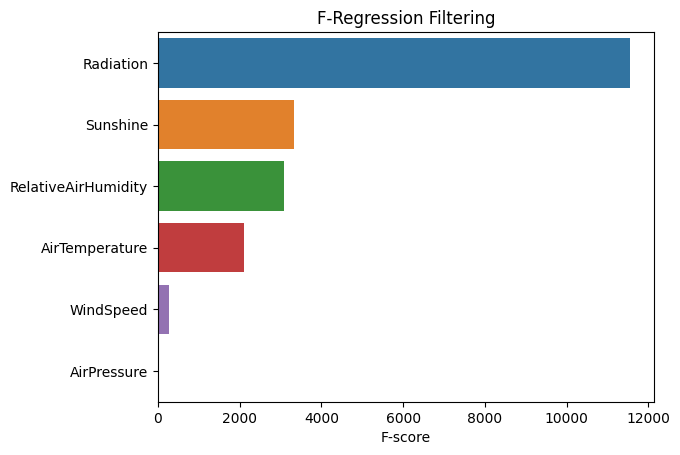

In [74]:
# Filtering feature selection using f_regression test:

selector_filtering = feature.univariate(statistic=f_regression)

##### 4.2.2) Random Forest Importance

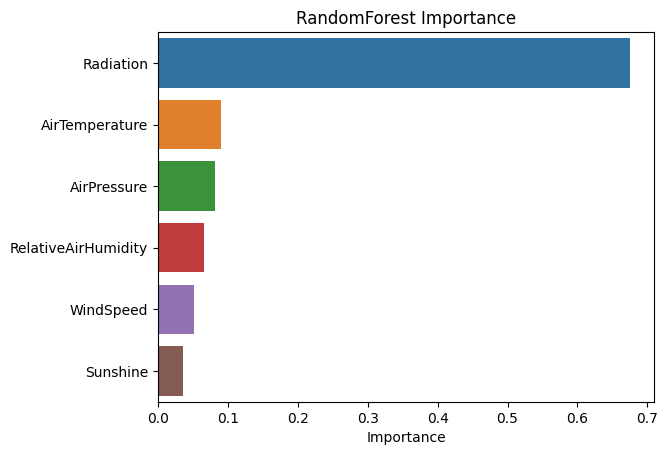

In [75]:
# Plotting Best features accordingly to the Random Forest Algorithm:

feature.randomforestR_imp()

Conclusion
- Accordingly to the Random Forest algorithm, Radiation is the variable that most describes the output target.

##### 4.2.3) XGBoost Importance

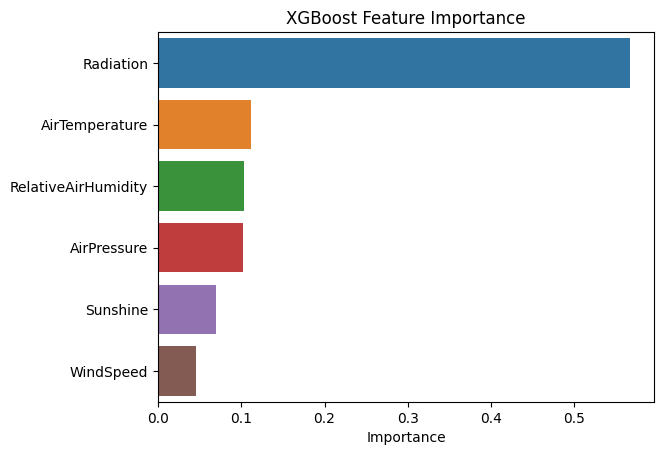

In [76]:
# Plotting the best features accordingly the XGBoost Algorithm:

feature.xgbR_imp()

Conclusion
- Accordingly to the XGboost algorithm, Radiation is the variable that most describes the output target.

##### 4.3.4) Recursive Feature Elimination (RFE)

In [180]:
# Mean test score for all of the Algorithms and for each number of columns:

feature.refcv()

,Lasso,Ridge,RandomForestR,ExtraTreeR,XGB
Columns 1,1467.860960,1477.986141,1133.246002,1207.972781,1045.061217
Columns 2,1301.266660,1312.583376,974.506010,1003.782575,973.252195
Columns 3,1155.614811,1158.127170,849.627134,934.740169,944.589000
Columns 4,1124.590002,1124.589720,819.966015,864.464221,848.063361
Columns 5,905.993187,905.993069,795.131463,785.949747,823.702505
Columns 6,903.620263,903.620225,772.033482,770.559293,788.551322


Conclusions

Accordingly to the Recursive Feature Elimination:
- Best model to find important features is the ExtraTreeRegressor.
- Best number of features is 6, which means that we will use all of them for further analysis.

#### 4.3) Transformations

##### 4.3.1) MinMax Scaler

Definition:
- MinMax Scaler is also called as Normalization, which is a technique that rescale all the values, usually, within a range of 0 and 1.

Mathematical Definition:

$X_{new_{i}} = \frac{X_{i} - X_{min_{i}}}{X_{max_{i}} - X_{min_{i}}}$




In [62]:
# MinMax Scaler Transformation:

min_max = MinMaxScaler()
X_train_min_max = min_max.fit_transform(X_train)
X_test_min_max = min_max.transform(X_test)

##### 4.3.2) Standard Scaler

Definition:
- The Standard Scaler is a technique that rescales the distribution of a variable so that the mean of the observed sample is 0 and the standard deviation is 1. It is particularly useful for algorithms that rely on distance measures, such as K-means and K-nearest neighbors (KNN). Additionally, it is a recommended choice for algorithms based on neural networks.

OBS: Standard Scaler can perform slightly worst than the other transformations because it assumes that the data is normally distributed. However you can still standarduze your data.

Matematical Definition:

$X_{new_{i}} = \frac{X_{i} - \hat{\mu}_{i}}{\sigma_{i}}$

- $\mu:$ Mean of the sample.
- $\sigma:$ Standard Deviation of the sample.

In [63]:
# Standard Scaler Transformation:

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

##### 4.3.3) Robust Scaler

Definition:
- Robust scaler is a technique which uses the median and the Interquartile range to transform the variables. This approach is very useful when the input variables have many outliers.

Mathematical Definition:

$X_{new_{i}} = \frac{X_{i} - median_{i}}{IQR_{i}}$

$IQR_{i} = P_{75_{i}} - P_{25_{i}}$

- $IQR:$ Interquartile Range.
- $P_{75}:$ 75th Percentile.
- $P_{25}:$ 25th Percentile.


In [64]:
# Robust Scaler Transformation:

rob = RobustScaler()
X_train_rb = rob.fit_transform(X_train)
X_test_rb = rob.fit_transform(X_test)

#### 4.4) Selecting the best Algorithm and Transformation

In [65]:
# Function used to evaluate the best algorithms:

def melhor_modelo(X_train, y_train):

    seed = 42
    cv = 5
    score = ['neg_root_mean_squared_error', 'r2']
    result_rmse = {}
    result_r2 = {}

    dicionario = { 
                "Lasso":Lasso(random_state=seed),
                "Ridge":Ridge(random_state=seed),
                "SVR":SVR(),
                "RandomForestR":RandomForestRegressor(random_state=seed),
                "ExtraTreeR":ExtraTreesRegressor(random_state=seed),
                "XGB":XGBRegressor(random_state=seed),
                "MLP":MLPRegressor(random_state=seed, max_iter=2000)
                 }


    for name, model in dicionario.items():
        k_fold = KFold(n_splits=cv, random_state=seed, shuffle=True)
        result = cross_validate(model, X_train, y_train, cv=k_fold, scoring=score)

        result_rmse[name] = -result['test_neg_root_mean_squared_error']
        result_r2[name] = result['test_r2']
        
        
    result_pd_rmse = pd.DataFrame(data=result_rmse)
    result_pd_r2 = pd.DataFrame(data=result_r2)
    
    return result_pd_rmse, result_pd_r2
    

##### 4.4.1) Algorithms using MinMax Scaler

In [66]:
# Best model:

resultado_rms, resultado_r2 = melhor_modelo(X_train_min_max, y_train)

In [67]:
# Root mean squared error results:

resultado_rms.describe()

,Lasso,Ridge,SVR,RandomForestR,ExtraTreeR,XGB,MLP
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,903.485007,903.400786,1491.625424,777.359187,775.023285,796.631552,903.149462
std,15.562091,15.628135,76.724616,44.754904,37.517289,56.469978,15.249867
min,883.515021,883.085192,1368.718235,709.711976,709.776868,710.759720,884.950591
25%,897.526534,897.819708,1474.371484,767.563919,776.598713,767.368293,895.889170
50%,898.300154,898.192638,1515.347110,781.613578,793.488589,827.759964,897.119584
75%,915.613173,915.621307,1529.832640,796.014928,795.642869,834.921067,916.230928
max,922.470155,922.285084,1569.857651,831.891534,799.609385,842.348716,921.557038


In [68]:
# R2 results:

resultado_r2.describe()

,Lasso,Ridge,SVR,RandomForestR,ExtraTreeR,XGB,MLP
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.638294,0.638374,0.017998,0.732798,0.734620,0.719589,0.638508
std,0.026434,0.026218,0.015911,0.021213,0.012827,0.025073,0.027293
min,0.599661,0.600050,0.001504,0.704749,0.713481,0.687616,0.598359
25%,0.636953,0.637099,0.003063,0.716051,0.731379,0.707674,0.637671
50%,0.638390,0.638476,0.020332,0.741676,0.741629,0.712968,0.639340
75%,0.642333,0.642327,0.025882,0.748647,0.742695,0.740913,0.641850
max,0.674132,0.673919,0.039210,0.752867,0.743915,0.748775,0.675320


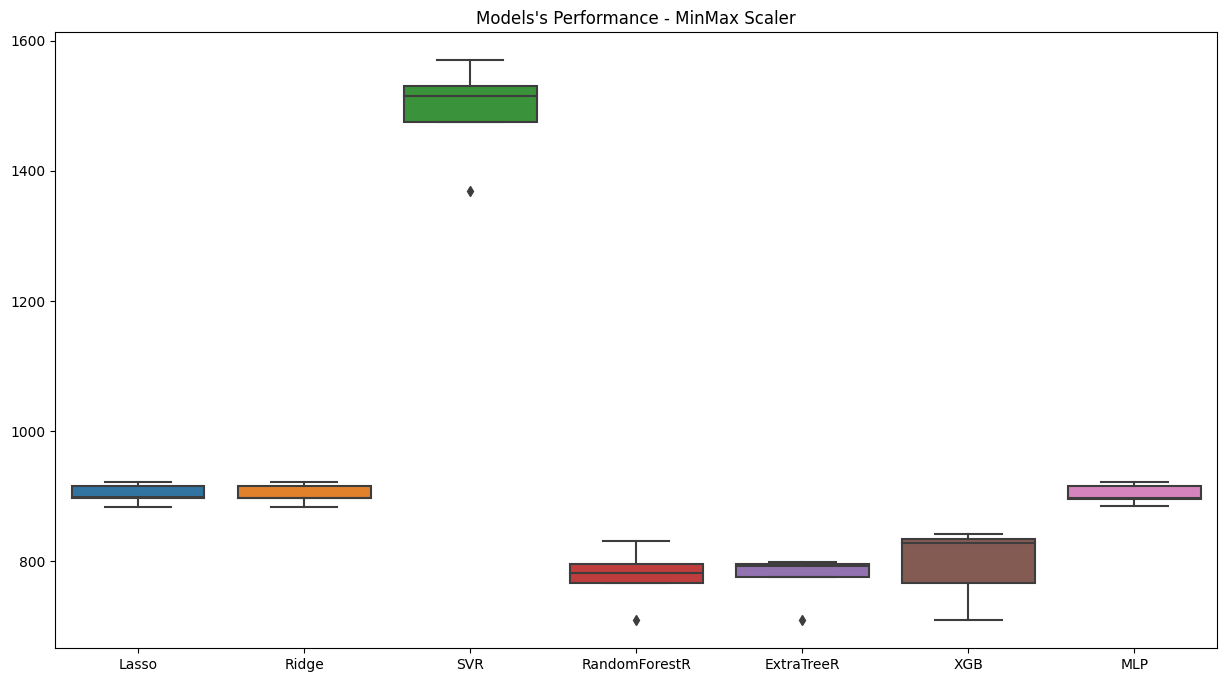

In [69]:
# PLotting model's performance:

plt.figure(figsize=(15, 8))
plt.title("Models's Performance - MinMax Scaler")
sns.boxplot(resultado_rms);

##### 4.4.2) Algorithms using Standard Scaler

In [70]:
# Best model:

resultado_rms, resultado_r2 = melhor_modelo(X_train_std, y_train)

In [71]:
# Root mean squared error results:

resultado_rms.describe()

,Lasso,Ridge,SVR,RandomForestR,ExtraTreeR,XGB,MLP
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,903.358839,903.348724,1530.475777,777.358424,775.054472,796.703441,862.939395
std,15.613713,15.632424,77.459091,44.998844,37.425748,57.132829,22.959748
min,883.396953,883.376841,1407.559380,709.420058,709.974316,709.015132,830.902836
25%,897.503104,897.532799,1509.000499,766.761334,776.598713,768.916041,856.534749
50%,897.863026,897.762911,1557.105336,782.169400,793.488589,826.964465,863.601966
75%,915.705262,915.761676,1569.520962,796.460193,795.601359,834.373150,869.038325
max,922.325850,922.309391,1609.192706,831.981138,799.609385,844.248418,894.619098


In [72]:
# R2 results:

resultado_r2.describe()

,Lasso,Ridge,SVR,RandomForestR,ExtraTreeR,XGB,MLP
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.638397,0.638406,-0.033882,0.732799,0.734596,0.719575,0.670359
std,0.026397,0.026382,0.015623,0.021337,0.012812,0.024960,0.019834
min,0.599768,0.599786,-0.050976,0.704685,0.713481,0.688026,0.645921
25%,0.637066,0.637079,-0.047522,0.715733,0.731379,0.708236,0.658544
50%,0.638742,0.638822,-0.034406,0.741889,0.741485,0.711672,0.671233
75%,0.642261,0.642217,-0.020414,0.749172,0.742695,0.742183,0.677795
max,0.674149,0.674128,-0.016094,0.752515,0.743942,0.747761,0.698301


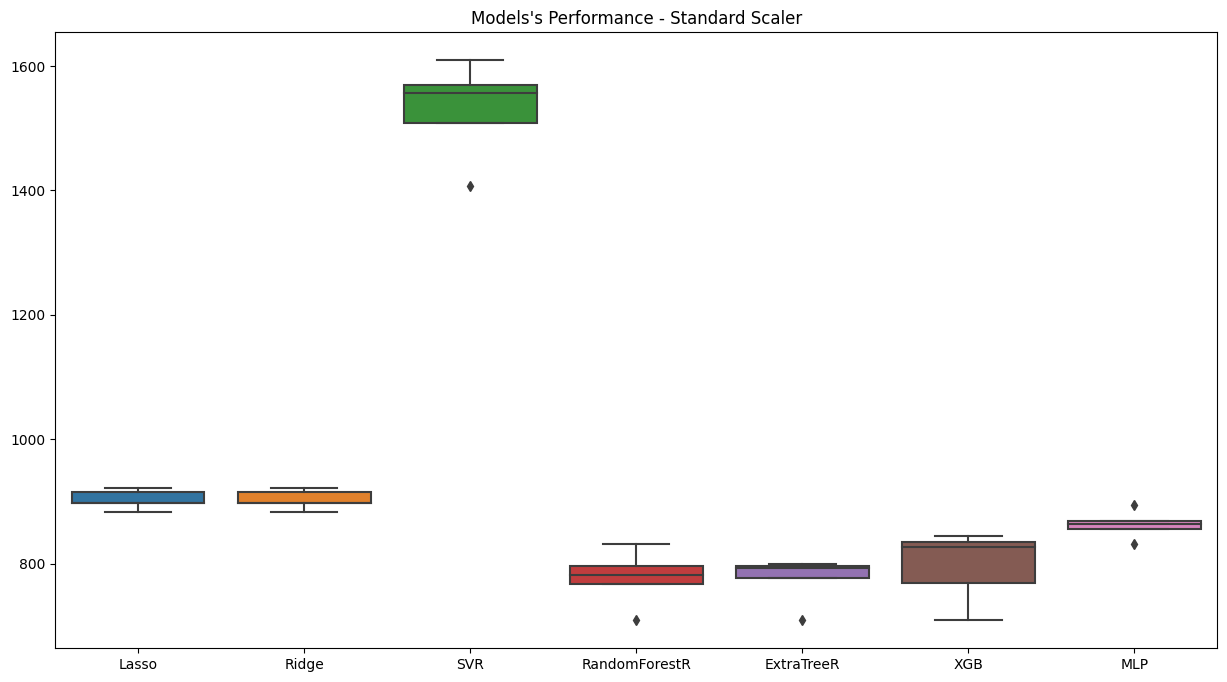

In [73]:
# PLotting model's performance:

plt.figure(figsize=(15, 8))
plt.title("Models's Performance - Standard Scaler")
sns.boxplot(resultado_rms);

##### 4.4.3) Algorithms using Robust Scaler

In [74]:
# Best model:

resultado_rms, resultado_r2 = melhor_modelo(X_train_rb, y_train)

In [75]:
# Root mean squared error results:

resultado_rms.describe()

,Lasso,Ridge,SVR,RandomForestR,ExtraTreeR,XGB,MLP
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,903.355648,903.348361,1482.596356,777.415145,775.018174,796.668225,876.956954
std,15.623197,15.632835,78.002979,44.754342,37.423964,57.775051,14.926458
min,883.412700,883.384740,1357.623438,709.669560,709.974316,706.881966,863.292220
25%,897.497262,897.526871,1464.431309,767.355707,776.417221,770.807039,867.246465
50%,897.797461,897.752247,1507.997183,781.161161,793.488589,826.768020,870.690222
75%,915.742087,915.767967,1521.297606,797.640675,795.601359,834.138524,883.666721
max,922.328731,922.309982,1561.632242,831.248623,799.609385,844.745576,899.889140


In [76]:
# R2 results:

resultado_r2.describe()

,Lasso,Ridge,SVR,RandomForestR,ExtraTreeR,XGB,MLP
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.638400,0.638406,0.029921,0.732748,0.734621,0.719632,0.658997
std,0.026403,0.026386,0.017796,0.021397,0.012831,0.024936,0.028769
min,0.599753,0.599779,0.012615,0.705205,0.713481,0.688201,0.614268
25%,0.637064,0.637079,0.013483,0.714890,0.731379,0.708374,0.654509
50%,0.638794,0.638831,0.029812,0.741707,0.741485,0.711332,0.666025
75%,0.642232,0.642212,0.038972,0.748783,0.742815,0.743732,0.666856
max,0.674153,0.674132,0.054723,0.753153,0.743942,0.746519,0.693328


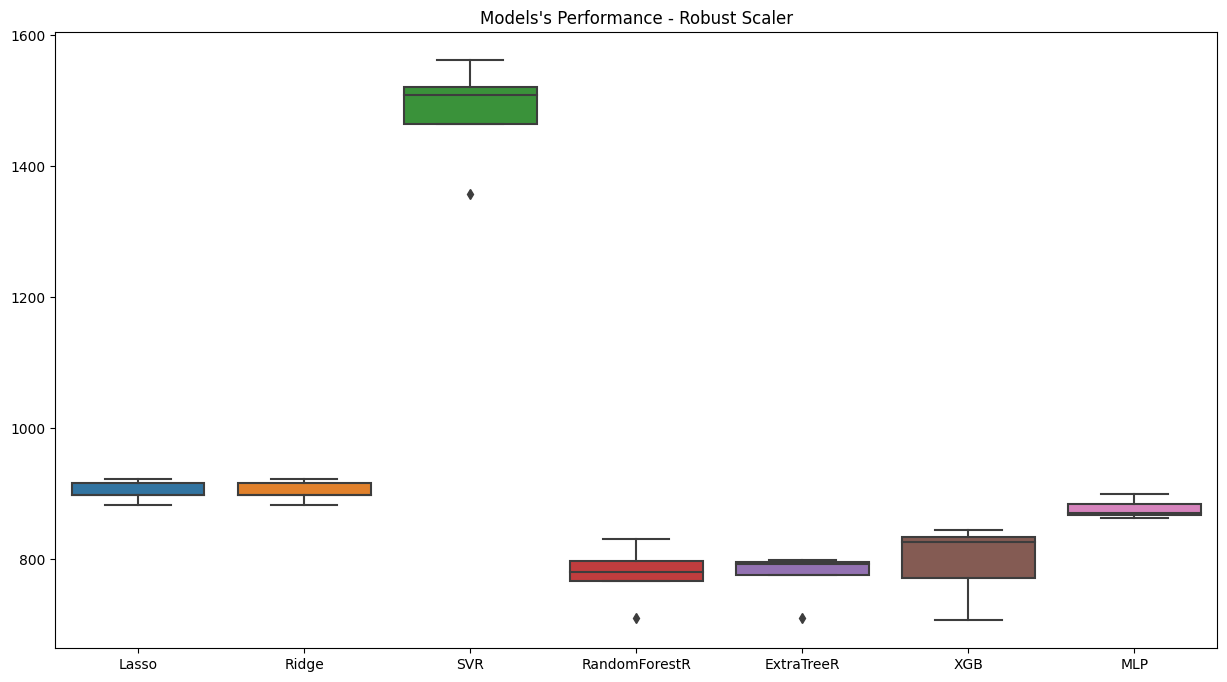

In [77]:
# PLotting model's performance:

plt.figure(figsize=(15, 8))
plt.title("Models's Performance - Robust Scaler")
sns.boxplot(resultado_rms);

Conclusions

- ExtraTres was the best Algorithm for all of the transformation algorithms.
- The Best Trasformation algorithm was Robust Scaler.

RMSE:
- Average:  775.018174
- Standard Deviation: 37.423964

R2
- Average: 0.734621
- Standard Deviation: 0.012831

### 5) Fine Tuning

In [78]:
# Function for fine tuning an arbitrary model:

def tuning(X_train, y_train, modelo, params):
    
    cv = 5
    score = "neg_root_mean_squared_error"
    grid  = GridSearchCV(modelo, cv=cv, param_grid=params, 
                         scoring=score, 
                         n_jobs=-1,
                         return_train_score=True,
                         )

    grid.fit(X_train, y_train)

    best_index = grid.best_index_
    result = grid.cv_results_

    train_score = -result['mean_train_score'][best_index]
    left_out = -result['mean_test_score'][best_index]



    print(f"Train score: {train_score}")
    print(f"Left out data score: {left_out}")

    return grid.best_estimator_

In [105]:
# Hypeparameters grid

params = {"n_estimators":[100, 110, 120],
          "max_depth":[4, 5, 6, 7],
          "max_features":[0.5, 0.6, 0.7],
          "min_samples_split":[3, 5, 6, 7, 10]}

In [106]:
extra_tree = ExtraTreesRegressor(random_state=42)
best_estimator = tuning(X_train_rb, y_train, extra_tree, params)

Train score: 765.3644951871554
Left out data score: 835.5946923397969


### 6) Predictions

In [107]:
best_model = clone(best_estimator)
best_model.fit(X_train_rb, y_train)

ExtraTreesRegressor(max_depth=7, max_features=0.7, min_samples_split=3,
                    n_estimators=110, random_state=42)

In [108]:
y_pred = best_model.predict(X_train_rb)

In [109]:
rms_train = np.sqrt(mean_squared_error(y_pred, y_train))
r2_train = r2_score(y_pred, y_train)

print("Train set:")
print(f"RMSE: {rms_train}")
print(f"R2: {r2_train}")

Train set:
RMSE: 777.204892038056
R2: 0.5682232687504819


In [110]:
y_pred = best_model.predict(X_test_rb)
rmse_test = np.sqrt(mean_squared_error(y_pred, y_test))
r2_test = r2_score(y_pred, y_test)

print("Test set:")
print(f"RMSE: {rmse_test}")
print(f"R2: {r2_test}")

Test set:
RMSE: 819.7307706495565
R2: 0.5347937839096278


Conclusions

- RMSE improved from 835.595 to 819.731.
- R2 score is approximately 0.5349.
- Model does not seem to suffer from Overfitting.